# Neural Network Classifier Using Simple Word Embeddings



---















In [ ]:
import keras
import numpy as np
from keras.layers import Lambda, GlobalAveragePooling1D, Dense, Embedding
from keras import backend as K
from keras.models import Sequential


### Downloading data

In [ ]:
imdb = keras.datasets.imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [5]:
print("Training entries: {}, labels: {}".format(len(X_train), len(y_train)))

Training entries: 25000, labels: 25000


In [6]:
 X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:

word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [ ]:

word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  
word_index["<UNUSED>"] = 3

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [10]:
reverse_word_index[25]

'you'

In [ ]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [12]:
decode_review(X_train[10])

"<START> french horror cinema has seen something of a revival over the last couple of years with great films such as inside and <UNK> romance <UNK> on to the scene <UNK> <UNK> the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made <UNK> was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is <UNK> by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named <UNK> sent to prison for fraud he is put in a cell with three others the quietly insane <UNK> body building <UNK> marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old <UNK> after <UNK> part of it they soon realise its magical powers and realise they may be able to use it

### Creating One-hot word vectors

In [ ]:
def OneHot(input_dim=None, input_length=None):
    
    if input_dim is None or input_length is None:
        raise TypeError("input_dim or input_length is not set")

    
    def _one_hot(x, num_classes):
        return K.one_hot(K.cast(x, 'uint8'),
                          num_classes=num_classes)

    return Lambda(_one_hot,
                  arguments={'num_classes': input_dim},
                  input_shape=(input_length,))

### Preparing input data

In [ ]:
VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 256

X_train_enc = keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

X_test_enc = keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [15]:
print(X_train_enc[1])


[   1  194 1153  194 8255   78  228    5    6 1463 4369 5012  134   26
    4  715    8  118 1634   14  394   20   13  119  954  189  102    5
  207  110 3103   21   14   69  188    8   30   23    7    4  249  126
   93    4  114    9 2300 1523    5  647    4  116    9   35 8163    4
  229    9  340 1322    4  118    9    4  130 4901   19    4 1002    5
   89   29  952   46   37    4  455    9   45   43   38 1543 1905  398
    4 1649   26 6853    5  163   11 3215    2    4 1153    9  194  775
    7 8255    2  349 2637  148  605    2 8003   15  123  125   68    2
 6853   15  349  165 4362   98    5    4  228    9   43    2 1157   15
  299  120    5  120  174   11  220  175  136   50    9 4373  228 8255
    5    2  656  245 2350    5    4 9837  131  152  491   18    2   32
 7464 1212   14    9    6  371   78   22  625   64 1382    9    8  168
  145   23    4 1690   15   16    4 1355    5   28    6   52  154  462
   33   89   78  285   16  145   95    0    0    0    0    0    0    0
    0 

In [ ]:
class GlobalAveragePooling1DMasked(GlobalAveragePooling1D):
    def call(self, x, mask=None):
        if mask != None:
            return K.sum(x, axis=1) / K.sum(mask, axis=1)
        else:
            return super().call(x)


### Neural Network model using one-hot vectors

In [18]:
# put your code here
model = Sequential()
model.add(OneHot(VOCAB_SIZE, MAX_SEQUENCE_LENGTH))
model.add(GlobalAveragePooling1DMasked())
model.add(Dense(1, activation='sigmoid'))


### Training the model

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 256, 10000)        0         
_________________________________________________________________
global_average_pooling1d_mas (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10001     
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_val = np.array(X_train_enc[:10000])
partial_X_train = np.array(X_train_enc[10000:])

y_val = np.array(y_train[:10000])
partial_y_train = np.array(y_train[10000:])

In [23]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)




Train on 15000 samples, validate on 10000 samples
Epoch 1/40





15000/15000 [==============================] - 13s 844us/step - loss: 0.6930 - acc: 0.5033 - val_loss: 0.6928 - val_acc: 0.4947
Epoch 2/40
15000/15000 [==============================] - 3s 199us/step - loss: 0.6925 - acc: 0.5047 - val_loss: 0.6924 - val_acc: 0.5066
Epoch 3/40
15000/15000 [==============================] - 3s 202us/step - loss: 0.6921 - acc: 0.5729 - val_loss: 0.6920 - val_acc: 0.5981
Epoch 4/40
15000/15000 [==============================] - 3s 199us/step - loss: 0.6917 - acc: 0.5885 - val_loss: 0.6917 - val_acc: 0.5487
Epoch 5/40
15000/15000 [==============================] - 3s 198us/step - loss: 0.6913 - acc: 0.5673 - val_loss: 0.6913 - val_acc: 0.5735
Epoch 6/40
15000/15000 [==============================] - 3s 199us/step - loss: 0.6909 - acc: 0.5873 - val_loss: 0.6909 - val_acc: 0.5925
Epoch 7/40
15000/15000 [==============================] - 3s 200us/step - loss: 0.6905 - acc: 0.6501 - val_loss: 

### Evaluating the model

In [25]:
results = model.evaluate(X_test_enc, y_test)

25000/25000 [==============================] - 4s 158us/step


In [26]:
print(results)
# loss, accuracay 

[0.6786146028709411, 0.67744]


### Plotting the accuracy graph

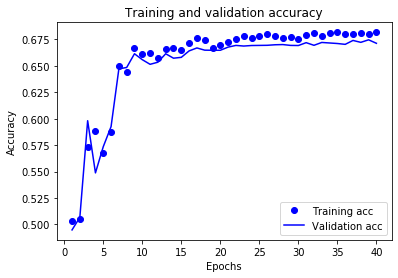

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Neural Network model using word embeddings

In [29]:
VOCAB_SIZE= 10000

# put the code here
model2 = Sequential()
model2.add(Embedding(VOCAB_SIZE, MAX_SEQUENCE_LENGTH))
model2.add(GlobalAveragePooling1DMasked())
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()


#=========
X_val = np.array(X_train_enc[:10000])
partial_X_train = np.array(X_train_enc[10000:])

history2 = model2.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

results = model2.evaluate(X_test_enc, y_test)
print(results)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
global_average_pooling1d_mas (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 2,560,257
Trainable params: 2,560,257
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 55us/step - loss: 0.6879 - acc: 0.5955 - val_loss: 0.6806 - val_acc: 0.6665
Epoch 2/40
15000/15000 [==============================] - 0s 28us/step - loss: 0.6693 - acc: 0.7255 - val_loss: 0.6582 - val_acc: 0.7335
Epoch 3/40
15000/15000 [==========================

In [30]:
results = model2.evaluate(X_test_enc, y_test)

25000/25000 [==============================] - 1s 50us/step


In [31]:
print (results)

[0.311287746515274, 0.87284]


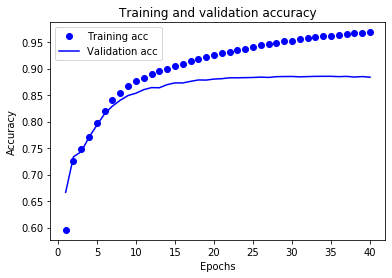

In [33]:
import matplotlib.pyplot as plt

history_dict = history2.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Using pre-trained word embeddings

In [ ]:
def readGloveFile(gloveFile):
    with open(gloveFile, 'r') as f:
        wordToGlove = {}  
        wordToIndex = {}  
        indexToWord = {}  

        for line in f:
            record = line.strip().split()
            token = record[0] 
            wordToGlove[token] = np.array(record[1:], dtype=np.float64) 
            
        tokens = sorted(wordToGlove.keys())
        for idx, tok in enumerate(tokens):
            kerasIdx = idx + 1  
            wordToIndex[tok] = kerasIdx 
            indexToWord[kerasIdx] = tok 

    return wordToIndex, indexToWord, wordToGlove

In [ ]:
from keras.initializers import Constant
def createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, isTrainable):
    vocabLen = len(wordToIndex) + 1  
    embDim = next(iter(wordToGlove.values())).shape[0]  
   
    embeddingMatrix = np.zeros((vocabLen, embDim))  
    for word, index in wordToIndex.items():
      try:
        embeddingMatrix[index, :] = wordToGlove[word] 
      except:
        print(embeddingMatrix[index, :].shape)
        print(wordToGlove[word].shape)
        

    embeddingLayer = Embedding(vocabLen, embDim, embeddings_initializer=Constant(embeddingMatrix), trainable=isTrainable)
    return embeddingLayer

In [50]:
# put the code here
wordToIndex, indexToWord, wordToGlove = readGloveFile('./glove.6B.50d.txt')

model3 = Sequential()
model3.add(createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, False))
model3.add(GlobalAveragePooling1DMasked())
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model3.summary()
#===
X_val = np.array(X_train_enc[:10000])
partial_X_train = np.array(X_train_enc[10000:])

history3 = model3.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

results = model3.evaluate(X_test_enc, y_test)
print(results)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 50)          20000050  
_________________________________________________________________
global_average_pooling1d_mas (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 20,000,101
Trainable params: 51
Non-trainable params: 20,000,050
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 105us/step - loss: 0.6934 - acc: 0.5007 - val_loss: 0.6928 - val_acc: 0.5136
Epoch 2/40
15000/15000 [==============================] - 0s 13us/step - loss: 0.6925 - acc: 0.5115 - val_loss: 0.6920 - val_acc: 0.5267
Epoch 3/40
15000/15000 [=====================

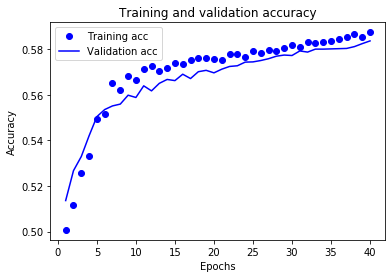

In [52]:
import matplotlib.pyplot as plt

history_dict = history3.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Adding another hidden layer to the network

In [60]:
# put your code here
wordToIndex, indexToWord, wordToGlove = readGloveFile('./glove.6B.50d.txt')

model4 = Sequential()
model4.add(createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, False))
model4.add(GlobalAveragePooling1DMasked())
model4.add(Dense(50, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model4.summary()
#===
X_val = np.array(X_train_enc[:10000])
partial_X_train = np.array(X_train_enc[10000:])

history4 = model4.fit(partial_X_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

results = model4.evaluate(X_test_enc, y_test)
print(results)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 50)          20000050  
_________________________________________________________________
global_average_pooling1d_mas (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 51        
Total params: 20,002,651
Trainable params: 2,601
Non-trainable params: 20,000,050
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 105us/step - loss: 0.6921 - acc: 0.5216 - val_loss: 0.6901 - val_acc: 0.5426
Epoch 2/40
15000/15000 [=======================

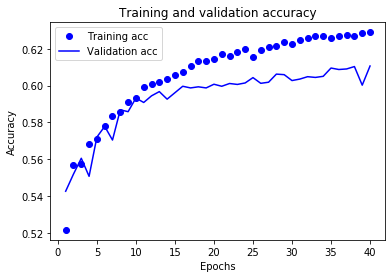

In [61]:
import matplotlib.pyplot as plt

history_dict = history4.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



---

